In [134]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from pycaret.regression import setup, create_model, tune_model, evaluate_model, predict_model


import warnings
warnings.filterwarnings("ignore")

In [135]:
df1 = pd.read_csv('../data/processed/Madrid_Dataset_wo_null_ayushya.csv', index_col = 0)
df2 = pd.read_csv('../data/processed/Additional_Dataset_wo_null_ayushya.csv', index_col = 0)


In [136]:
df1

,sq_mt_built,n_rooms,n_bathrooms,floor,buy_price,is_renewal_needed,built_year,has_lift,is_exterior,district
0,64.0,2,1.0,three,85000,False,1960.0,False,True,Villaverde 21
1,70.0,3,1.0,four,129900,True,1971.0,True,True,Villaverde 21
2,94.0,2,2.0,one,144247,False,1971.0,True,True,Villaverde 21
3,64.0,2,1.0,zero,109900,False,1955.0,True,True,Villaverde 21
4,108.0,2,2.0,four,260000,False,2003.0,True,True,Villaverde 21
...,...,...,...,...,...,...,...,...,...,...
21735,88.0,2,2.0,one,360000,False,1971.0,True,True,Barajas 2
21736,99.0,2,2.0,one,349000,False,1971.0,True,True,Barajas 2
21737,78.0,2,2.0,four,350000,False,2020.0,True,True,Barajas 2
21738,96.0,2,2.0,three,425000,False,2002.0,True,True,Barajas 2


In [137]:
df1.floor.value_counts()

floor
one              3557
two              2790
three            2365
zero             1846
four             1789
five             1004
six               692
seven             432
eight             263
mezzanine         241
nine              137
semi-basement      87
basement           26
Name: count, dtype: int64

In [138]:
df1 = df1.rename(columns={'sq_mt_built': 'Area',
                           'n_rooms': 'rooms',
                           'n_bathrooms': 'bathrooms',
                           'floor':'floor',
                           'buy_price': 'price',
                           'is_renewal_needed': 'is_renewal_needed',
                           'built_year': 'built_year',
                           'has_lift': 'elevator',
                           'is_exterior': 'exterior',
                           'district': 'district'
                           })

In [139]:
df2

,price,house_type_2,rooms,m2,elevator,garage,neighborhood,district,house_type_,floor
0,495000,exterior,3,118.0,True,True,Chopera,Arganzuela,Apartment,1
1,485000,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela,Apartment,2
2,315000,exterior,2,72.0,False,False,Legazpi,Arganzuela,Apartment,2
3,585000,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela,Apartment,4
4,255000,exterior,3,75.0,False,False,Acacias,Arganzuela,bajo,0
...,...,...,...,...,...,...,...,...,...,...
15969,380000,exterior,3,90.0,True,True,Butarque,villaverde,Apartment,5
15971,108000,exterior,3,60.0,False,False,San CristÃ³bal,villaverde,Apartment,3
15972,140000,exterior,2,65.0,False,False,San CristÃ³bal,villaverde,bajo,0
15973,135000,exterior,2,71.0,False,False,Los Rosales,villaverde,Apartment,1


In [140]:
df2 = df2.rename(columns={'m2': 'Area',
                           'rooms': 'rooms',
                           'floor':'floor',
                           'price': 'price',
                           'elevator': 'elevator',
                           'house_type_2': 'exterior',
                           'district': 'district',
                           'garage': 'garage',
                           'neighborhood': 'neighborhood',
                           'house_type_': 'HouseType'
                           })

In [141]:
df2.floor.value_counts()

floor
 1     2592
 2     2205
 0     2168
 3     1901
 4     1378
 5      833
 6      497
 7      310
 8      173
 9      118
 10      69
 11      42
 13      33
 12      27
-1       13
 14      10
 15       7
 18       5
 16       4
 20       4
 19       2
Name: count, dtype: int64

In [142]:
df1.columns

Index(['Area', 'rooms', 'bathrooms', 'floor', 'price', 'is_renewal_needed',
       'built_year', 'elevator', 'exterior', 'district'],
      dtype='object')

In [143]:
df2.columns

Index(['price', 'exterior', 'rooms', 'Area', 'elevator', 'garage',
       'neighborhood', 'district', 'HouseType', 'floor'],
      dtype='object')

In [144]:
# Create a mapping dictionary to convert string floors to integers
floor_mapping = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
    'mezzanine': 0.5, 'semi-basement': -0.5, 'basement': -1
}

# Replace the 'floor' values in df1 using the mapping
df1['floor'] = df1['floor'].replace(floor_mapping)

# Ensure both 'floor' columns are of the same data type
df1['floor'] = df1['floor'].astype(float)
df2['floor'] = df2['floor'].astype(float)


In [145]:
# Perform an outer merge with suffixes for common columns
merged_df = pd.merge(df1, df2, on=['price', 'exterior', 'rooms', 'Area', 'elevator', 'district', 'floor'], how='outer', suffixes=('_df1', '_df2'))


In [146]:
merged_df

,Area,rooms,bathrooms,floor,price,is_renewal_needed,built_year,elevator,exterior,district,garage,neighborhood,HouseType
0,64.0,2,1.0,3.0,85000,False,1960.0,False,True,Villaverde 21,NaN,NaN,NaN
1,70.0,3,1.0,4.0,129900,True,1971.0,True,True,Villaverde 21,NaN,NaN,NaN
2,94.0,2,2.0,1.0,144247,False,1971.0,True,True,Villaverde 21,NaN,NaN,NaN
3,64.0,2,1.0,0.0,109900,False,1955.0,True,True,Villaverde 21,NaN,NaN,NaN
4,108.0,2,2.0,4.0,260000,False,2003.0,True,True,Villaverde 21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27615,90.0,3,NaN,5.0,380000,NaN,NaN,True,exterior,villaverde,True,Butarque,Apartment
27616,60.0,3,NaN,3.0,108000,NaN,NaN,False,exterior,villaverde,False,San CristÃ³bal,Apartment
27617,65.0,2,NaN,0.0,140000,NaN,NaN,False,exterior,villaverde,False,San CristÃ³bal,bajo
27618,71.0,2,NaN,1.0,135000,NaN,NaN,False,exterior,villaverde,False,Los Rosales,Apartment


In [147]:
merged_df.isna().sum()

Area                     0
rooms                    0
bathrooms            12391
floor                    0
price                    0
is_renewal_needed    12391
built_year           12391
elevator                 0
exterior                 0
district                 0
garage               15229
neighborhood         15229
HouseType            15229
dtype: int64

In [148]:
merged_df = merged_df.dropna(axis=1)
merged_df

,Area,rooms,floor,price,elevator,exterior,district
0,64.0,2,3.0,85000,False,True,Villaverde 21
1,70.0,3,4.0,129900,True,True,Villaverde 21
2,94.0,2,1.0,144247,True,True,Villaverde 21
3,64.0,2,0.0,109900,True,True,Villaverde 21
4,108.0,2,4.0,260000,True,True,Villaverde 21
...,...,...,...,...,...,...,...
27615,90.0,3,5.0,380000,True,exterior,villaverde
27616,60.0,3,3.0,108000,False,exterior,villaverde
27617,65.0,2,0.0,140000,False,exterior,villaverde
27618,71.0,2,1.0,135000,False,exterior,villaverde


In [149]:
duplicates = merged_df.duplicated()

# Print rows that are duplicates
print("Duplicate rows based on all columns:")
print(merged_df[duplicates])

df = merged_df.drop_duplicates(keep='last')

Duplicate rows based on all columns:
        Area  rooms  floor   price  elevator  exterior           district
32     125.0      3    7.0  275000      True      True      Villaverde 21
82     125.0      3    1.0  210000      True      True      Villaverde 21
151     90.0      2    7.0  240000      True      True      Villaverde 21
290     55.0      2    3.0   96600     False      True      Villaverde 21
344     56.0      3    1.0   78000     False      True      Villaverde 21
...      ...    ...    ...     ...       ...       ...                ...
26186   81.0      2    2.0  225000      True  exterior              usera
26423   90.0      3    0.0  150000      True  exterior              usera
26903  117.0      4    3.0  419000      True  exterior  villa-de-vallecas
27104   84.0      1    0.0  165000      True  exterior  villa-de-vallecas
27228  100.0      3    2.0  165000     False  exterior         villaverde

[830 rows x 7 columns]


In [150]:
df

,Area,rooms,floor,price,elevator,exterior,district
0,64.0,2,3.0,85000,False,True,Villaverde 21
1,70.0,3,4.0,129900,True,True,Villaverde 21
2,94.0,2,1.0,144247,True,True,Villaverde 21
3,64.0,2,0.0,109900,True,True,Villaverde 21
4,108.0,2,4.0,260000,True,True,Villaverde 21
...,...,...,...,...,...,...,...
27615,90.0,3,5.0,380000,True,exterior,villaverde
27616,60.0,3,3.0,108000,False,exterior,villaverde
27617,65.0,2,0.0,140000,False,exterior,villaverde
27618,71.0,2,1.0,135000,False,exterior,villaverde


In [151]:
df.exterior.value_counts()

exterior
True        13007
exterior    10749
False        1538
interior     1496
Name: count, dtype: int64

In [152]:
df['exterior'] = df['exterior'].replace({'exterior': True, 'interior': False})
df.exterior.value_counts()

exterior
True     23756
False     3034
Name: count, dtype: int64

In [153]:
df.describe()

,Area,rooms,floor,price
count,26790.000000,26790.000000,26790.000000,2.679000e+04
mean,99.773722,2.609406,2.579955,4.032544e+05
std,47.901984,1.092648,2.208015,2.969137e+05
min,15.000000,0.000000,-1.000000,7.250000e+02
25%,65.000000,2.000000,1.000000,1.800000e+05
50%,88.000000,3.000000,2.000000,2.999945e+05
75%,122.000000,3.000000,4.000000,5.450000e+05
max,500.000000,12.000000,20.000000,2.195000e+06


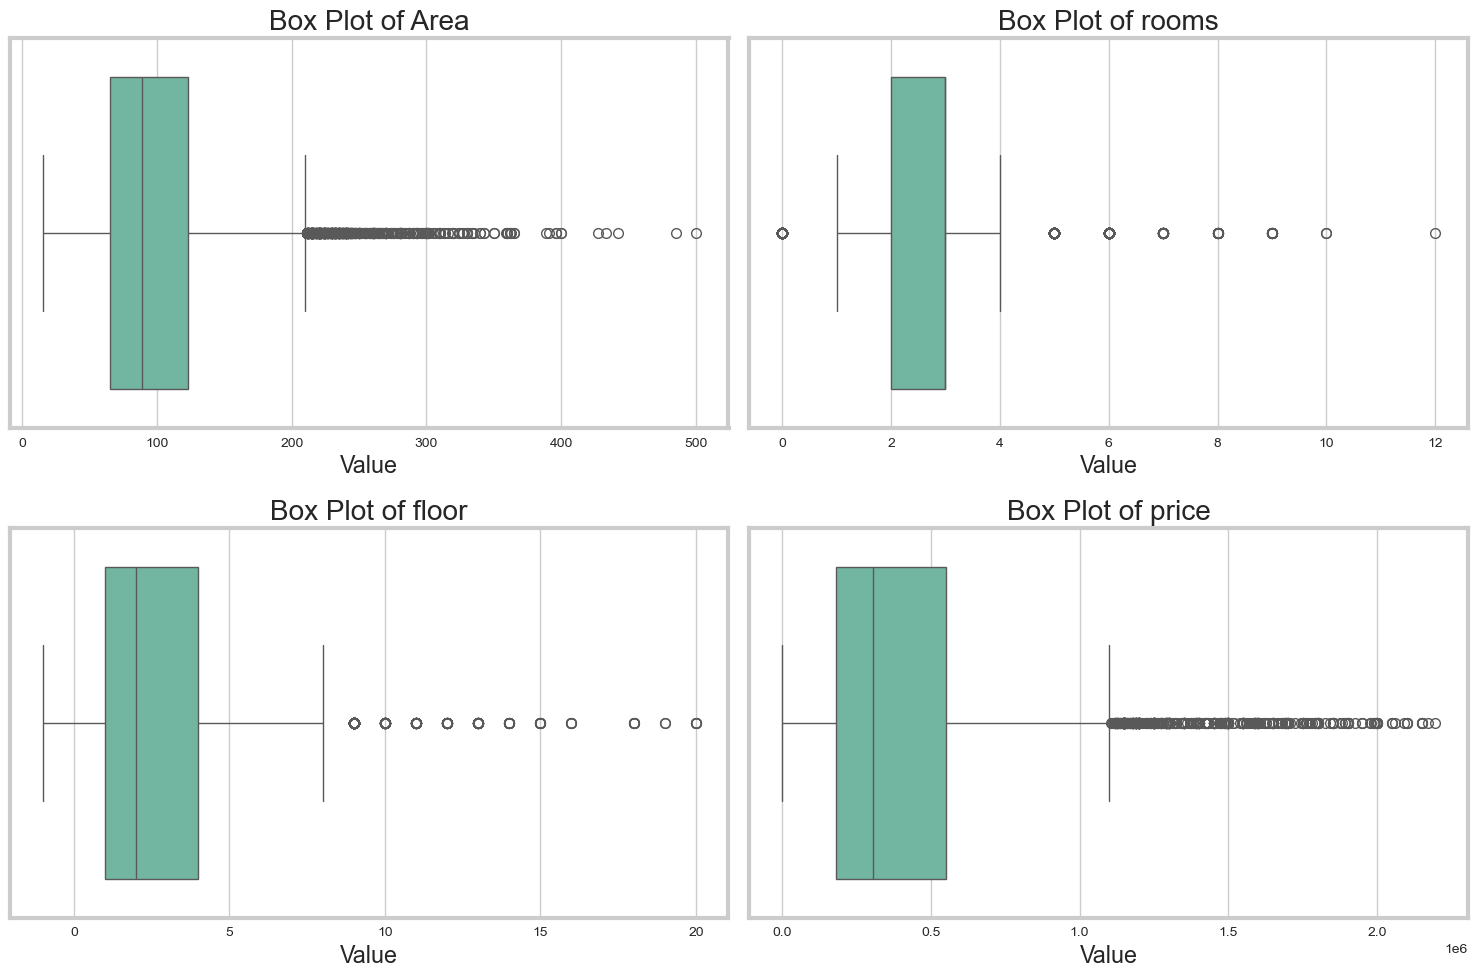

In [154]:
columns_of_interest = ['Area', 'rooms', 'floor', 'price']

# Set the plot style using seaborn
sns.set_style("whitegrid")

# Create two columns of box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Adjust the figure size as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create box plots for each numerical column
for i, column in enumerate(columns_of_interest):
    sns.boxplot(x=merged_df[column], orient="v", palette="Set2", ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()

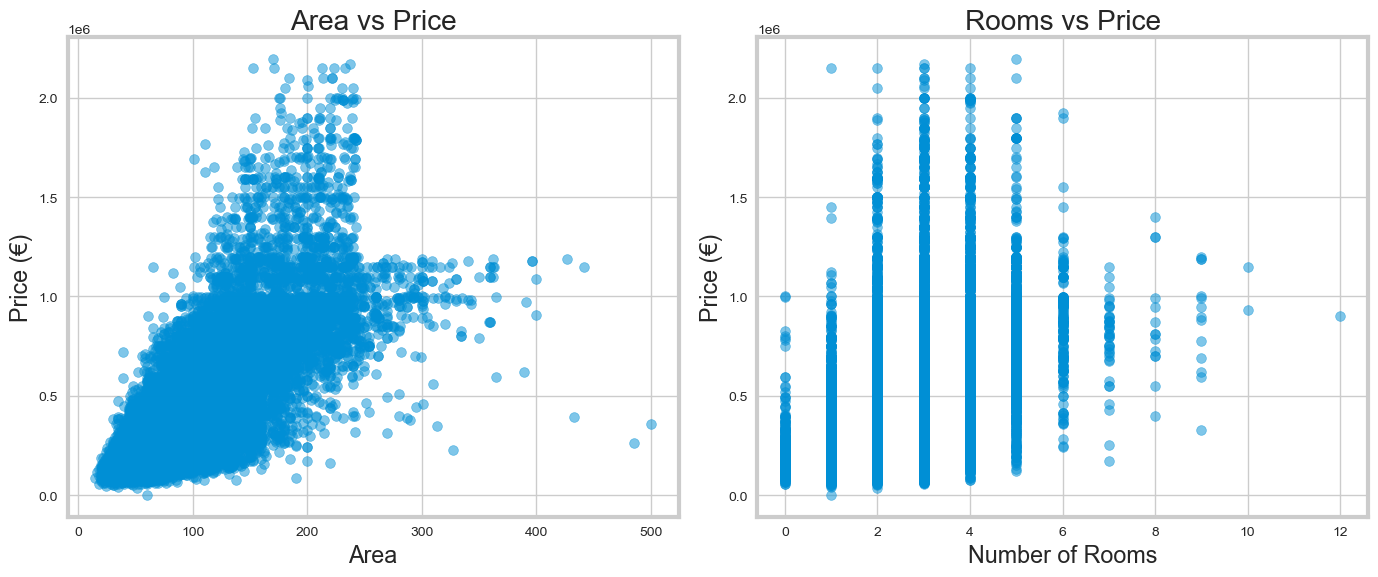

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Scatter plot of 'Area' vs 'price'
plt.subplot(1, 2, 1)
plt.scatter(merged_df['Area'], merged_df['price'], alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Price (€)')
plt.title('Area vs Price')

# Scatter plot of 'rooms' vs 'price'
plt.subplot(1, 2, 2)
plt.scatter(merged_df['rooms'], merged_df['price'], alpha=0.5)
plt.xlabel('Number of Rooms')
plt.ylabel('Price (€)')
plt.title('Rooms vs Price')


plt.tight_layout()
plt.show()



In [156]:
from pycaret.regression import *

In [157]:
# Perform one-hot encoding for categorical columns
#merged_df = pd.get_dummies(merged_df, columns=['district', 'neighborhood', 'HouseType'])


In [158]:
df.head()

,Area,rooms,floor,price,elevator,exterior,district
0,64.0,2,3.0,85000,False,True,Villaverde 21
1,70.0,3,4.0,129900,True,True,Villaverde 21
2,94.0,2,1.0,144247,True,True,Villaverde 21
3,64.0,2,0.0,109900,True,True,Villaverde 21
4,108.0,2,4.0,260000,True,True,Villaverde 21


In [159]:
regression_setup = setup(
    data=df,
    target = 'price',
    session_id=1,
    )

,Description,Value
0,Session id,1
1,Target,price
2,Target type,Regression
3,Original data shape,"(26790, 7)"
4,Transformed data shape,"(26790, 7)"
5,Transformed train set shape,"(18753, 7)"
6,Transformed test set shape,"(8037, 7)"
7,Numeric features,3
8,Categorical features,1
9,Preprocess,True


In [160]:
# compare baseline models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,72473.6678,13257355585.6545,115103.9297,0.8508,0.2366,0.2028,0.5210
gbr,Gradient Boosting Regressor,76107.1421,14235087755.5564,119281.3104,0.8398,0.2489,0.2152,0.0880
rf,Random Forest Regressor,75184.4984,14803567792.7097,121611.8962,0.8335,0.2498,0.2116,0.3010
et,Extra Trees Regressor,77516.1253,16104811133.8130,126813.8596,0.8189,0.2602,0.2185,0.2280
knn,K Neighbors Regressor,82058.7336,17099880728.1328,130703.0220,0.8076,0.2687,0.2266,0.0090
lar,Least Angle Regression,93830.8563,20306705644.4221,142410.2716,0.7718,0.4514,0.2916,0.0090
llar,Lasso Least Angle Regression,93830.6244,20306705915.1901,142410.2721,0.7718,0.4515,0.2915,0.0080
br,Bayesian Ridge,93813.3275,20306772083.2284,142410.4626,0.7718,0.4564,0.2914,0.0100
ridge,Ridge Regression,93830.3732,20306703667.6631,142410.2634,0.7718,0.4515,0.2915,0.0080
lasso,Lasso Regression,93830.6244,20306705915.4776,142410.2721,0.7718,0.4515,0.2915,0.0080


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.[LightGBM] [Info] Total Bins 330

[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 16877, number of used features: 6
[LightGBM] [Info] Number of data points in the train set: 16877, number of used features: 6
[LightGBM] [Info] Number of data points

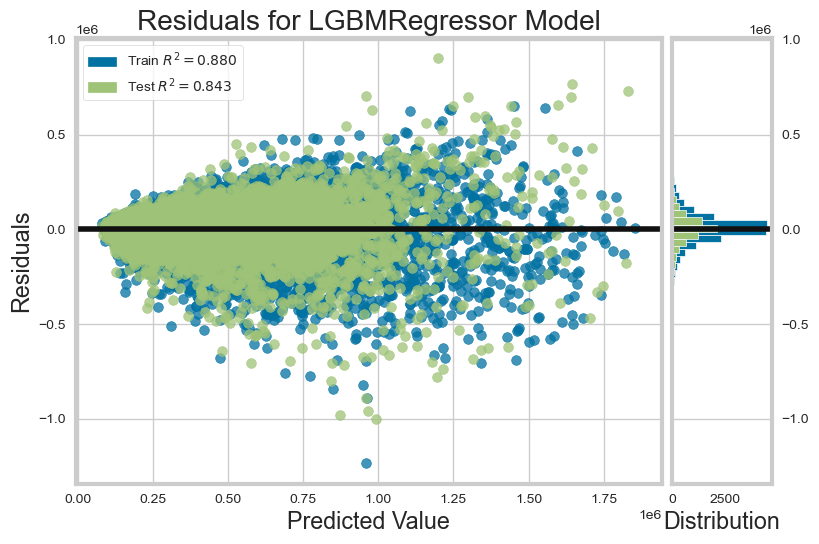

In [161]:
# plot residuals
plot_model(best_model, plot = 'residuals')

In [162]:
# predict on test set
holdout_pred = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,72788.8879,13567778572.4311,116480.8077,0.8428,0.2381,0.1923


In [163]:
# show predictions df
holdout_pred[['price', 'prediction_label']] = holdout_pred[['price', 'prediction_label']].astype(int)
print(holdout_pred[['price', 'prediction_label']].head(10))

         price  prediction_label
6177    529000            667157
2977    147000            182554
14194   210000            228400
9896   1045000            998529
14452   160000            186981
5113    115000            155161
23814   229000            162550
25028   127500            147809
24353   930000           1204733
6287    930000            848969


### Tuning

##### LGBM Tuning

In [164]:
# Create Extra Trees Regressor model
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,73393.4585,14494307140.3960,120392.3052,0.8392,0.2334,0.1875
1,73901.2923,13913357071.2973,117954.8942,0.8442,0.2666,0.3273
2,71188.4395,12935664566.1269,113735.0630,0.8550,0.2299,0.1852
3,73772.5181,13172478280.3004,114771.4175,0.8612,0.2287,0.1884
4,71848.1864,12875932245.1111,113472.1651,0.8593,0.2362,0.1885
5,71697.9679,12350983258.1539,111134.9777,0.8594,0.2328,0.1911
6,71384.3866,13165024298.5999,114738.9398,0.8463,0.2317,0.1868
7,74187.7795,13472848565.7571,116072.6004,0.8427,0.2375,0.1945
8,70551.0781,12274743041.7244,110791.4394,0.8499,0.2385,0.1901


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 16877, number of used features: 6
[LightGBM] [Info] Start training from score 404074.963204
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 16877, number of used features: 6
[LightGBM] [Info] Start training from score 404028.725721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

In [165]:
from sklearn.ensemble import LightGradientBoostingMachine
# Tune hyperparameters of Light Gradient Boosting Machine

# lgbm_params = {
#     'n_estimators': [50, 100, 150, 200, 250],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 7, 10],
#     'min_samples_leaf': [1, 2, 4, 5],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# Tune hyperparameters of Extra Trees Regressor
tuned_lgbm = tune_model(lgbm, 
                        #custom_grid = lgbm_params,
                        n_iter=50, 
                        optimize='R2', 
                        fold=15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,72452.2302,15349122914.8768,123891.5773,0.8305,0.2288,0.1808
1,75108.2241,14542788281.0438,120593.4836,0.8370,0.2396,0.1943
2,73572.7947,13865405698.5594,117751.4573,0.8446,0.2788,0.4009
3,72793.0536,14304213698.4694,119600.2245,0.8340,0.2346,0.1870
4,71198.2621,12260400368.4134,110726.6922,0.8657,0.2275,0.1839
5,74874.1104,13537852491.9574,116352.2776,0.8628,0.2249,0.1854
6,74689.4790,14041386553.5622,118496.3567,0.8504,0.2344,0.1843
7,69144.8939,12212884446.8020,110511.9199,0.8575,0.2270,0.1859
8,71736.5082,12179804191.0914,110362.1502,0.8637,0.2368,0.1938


Fitting 15 folds for each of 50 candidates, totalling 750 fits
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [I

In [166]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,76511.4302,15172613796.3125,123177.1643,0.8317,0.2460,0.1988
1,75959.8018,14379723065.8591,119915.4830,0.8389,0.2750,0.3365
2,74275.0722,13857536869.7325,117718.0397,0.8447,0.2413,0.1964
3,76946.5271,14238169634.9601,119323.8016,0.8500,0.2407,0.2005
4,76644.7325,14185228976.3817,119101.7589,0.8450,0.2501,0.2035
5,75323.1839,13094496776.5183,114431.1880,0.8509,0.2436,0.2031
6,74595.3358,13912243304.9378,117950.1730,0.8376,0.2451,0.2001
7,78867.0311,14969890121.7925,122351.5023,0.8252,0.2516,0.2081
8,75559.0492,13558981032.5633,116443.0377,0.8342,0.2522,0.2045


In [171]:
from sklearn.ensemble import GradientBoostingRegressor
# Tune hyperparameters of Gradient Boosting Regressor

# gbr_params = {
#     'n_estimators': [50, 100, 150, 200, 250],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 7, 10],
#     'min_samples_leaf': [1, 2, 4, 5],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# Tune hyperparameters of Extra Trees Regressor
tuned_gbr = tune_model(gbr, 
                       #custom_grid=gbr_params, 
                       n_iter=50, 
                       optimize='R2', 
                       fold=15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,70399.2104,14221908753.1631,119255.6445,0.8430,0.2244,0.1777
1,73908.6591,14248172962.1576,119365.7110,0.8403,0.2393,0.1939
2,74627.4103,14289170173.7659,119537.3171,0.8399,0.2781,0.3943
3,71283.3060,13779811130.9715,117387.4403,0.8401,0.2332,0.1846
4,70317.9235,12166445659.7018,110301.6122,0.8668,0.2270,0.1823
5,73278.1145,13363966853.1203,115602.6248,0.8646,0.2214,0.1819
6,73319.6025,13830678568.4872,117603.9054,0.8527,0.2351,0.1824
7,68833.1435,11785560652.7663,108561.3221,0.8624,0.2252,0.1843
8,69225.0747,11378596617.4970,106670.5049,0.8727,0.2316,0.1884


Fitting 15 folds for each of 50 candidates, totalling 750 fits
